In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")
from fastai.vision import *
#from torch.utils.data import SequentialSampler
#from fastai3D import mysampler
#from fastai3D import loader 

In [3]:
path = Path('/home/suze/Documents/Thesis/seed_images/Data_for_ML_Test/train')
path.ls()

[PosixPath('/home/suze/Documents/Thesis/seed_images/Data_for_ML_Test/train/NewLabels'),
 PosixPath('/home/suze/Documents/Thesis/seed_images/Data_for_ML_Test/train/Images'),
 PosixPath('/home/suze/Documents/Thesis/seed_images/Data_for_ML_Test/train/models'),
 PosixPath('/home/suze/Documents/Thesis/seed_images/Data_for_ML_Test/train/valid.txt'),
 PosixPath('/home/suze/Documents/Thesis/seed_images/Data_for_ML_Test/train/environment.yml')]

In [4]:
path_img = path/'Images' #should later be provided through ini file
path_lbl = path/'NewLabels' #should later be provided through ini file

In [5]:
img_names=get_image_files(path_img)
img_names[:3]

[PosixPath('/home/suze/Documents/Thesis/seed_images/Data_for_ML_Test/train/Images/BM1_1604.tif'),
 PosixPath('/home/suze/Documents/Thesis/seed_images/Data_for_ML_Test/train/Images/BM1_1461.tif'),
 PosixPath('/home/suze/Documents/Thesis/seed_images/Data_for_ML_Test/train/Images/BM1_1967.tif')]

In [6]:
lbl_names=get_image_files(path_lbl)
lbl_names[:3]

[PosixPath('/home/suze/Documents/Thesis/seed_images/Data_for_ML_Test/train/NewLabels/BM1_1604.tif'),
 PosixPath('/home/suze/Documents/Thesis/seed_images/Data_for_ML_Test/train/NewLabels/BM1_1461.tif'),
 PosixPath('/home/suze/Documents/Thesis/seed_images/Data_for_ML_Test/train/NewLabels/BM1_0176.tif')]

In [7]:
def get_mask(img):
    return (path_lbl)/img.name

In [8]:
#def get_mask(x):
#    return PosixPath(str(x)
#            .replace('train','NewLabels')
#            .replace('valid','NewLabels'))
            #.replace('resampled', 'labels'))

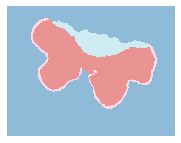

In [9]:
mask = open_mask(get_mask(img_names[0]))
mask.show()

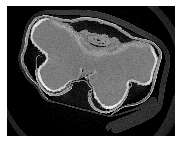

In [10]:
img = open_image(img_names[0])
img.show()

In [11]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([668, 864]), tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]]))

In [12]:
src = (SegmentationItemList.from_folder(path)
       #.split_subsets(train_size=0.2, valid_size=0.1)
       .split_by_fname_file('valid.txt')
       .label_from_func(get_mask, classes=list(range(4))))

In [13]:
data = (src.transform(get_transforms(), tfm_y=True, size=128)
       .databunch(bs=7)
       .normalize())
#data.show_batch(4, figsize=(10,7))
data.batch_size

7

In [14]:
data

ImageDataBunch;

Train: LabelList (3181 items)
x: SegmentationItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: SegmentationLabelList
ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128)
Path: /home/suze/Documents/Thesis/seed_images/Data_for_ML_Test/train;

Valid: LabelList (200 items)
x: SegmentationItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: SegmentationLabelList
ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128)
Path: /home/suze/Documents/Thesis/seed_images/Data_for_ML_Test/train;

Test: None

In [15]:
#data.train_dl = data.train_dl.new(shuffle=False, drop_last=False, sampler=None, batch_sampler=mysampler.OrderedBatchSampler(SequentialSampler(data.train_dl), 3, False))

In [15]:
data

ImageDataBunch;

Train: LabelList (3181 items)
x: SegmentationItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: SegmentationLabelList
ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128)
Path: /home/suze/Documents/Thesis/seed_images/Data_for_ML_Test/train;

Valid: LabelList (200 items)
x: SegmentationItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: SegmentationLabelList
ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128)
Path: /home/suze/Documents/Thesis/seed_images/Data_for_ML_Test/train;

Test: None

In [16]:
#data
data.batch_size

7

In [18]:
#data.show_batch(4, figsize=(10,7))

In [17]:
#from Nikos

def acc_seeds(input, target):
    target = target.squeeze(1)
    mask = target != 0
    return (input.argmax(dim=1)[mask] == target[mask]).float().mean()

In [18]:
metrics=acc_seeds
wd=1e-2

In [19]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

In [22]:
learn.model[:]

ModuleList(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [23]:
#learn.lr_find()
#learn.recorder.plot()

In [24]:
#learn.fit_one_cycle(cyc_len=1, max_lr=1e-4)

In [25]:
#learn.show_results()

In [26]:
#learn.freeze()

In [27]:
#learn.save('stage-1')

In [28]:
#learn.load('stage-1');

In [29]:
#learn.unfreeze()

In [30]:
#lrs = slice(1e-4/100, 1e-4)

In [31]:
#learn.fit_one_cycle(4, lrs)

In [32]:
a_batch = data.one_batch(detach=True)
a_batch
a_batch[0].size()

torch.Size([7, 3, 128, 128])

In [40]:
model = nn.Sequential(
    nn.Conv2d(3,  16, kernel_size=2, stride=2, padding=1), nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=2, stride=2, padding=1), nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=2, stride=2, padding=1), nn.ReLU(),
    #nn.AdaptiveAvgPool2d(1),
)

from matplotlib import pyplot as plt

for xb, yb in data.train_dl:
    
    out = (learn.model(*[xb]))
    #plt.imshow(out[0][0:3])
    #print(xb.size())
    #print(yb.size())
    print(out.size())
    #print(out[0][0:3].size())
    
    break

torch.Size([7, 4, 128, 128])


In [22]:
model = nn.Sequential(
    nn.Conv2d(3,  16, kernel_size=3, stride=2, padding=1), nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1), nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1), nn.ReLU(),
    MergeLayer()
    #nn.AdaptiveAvgPool2d((8,1))
    #Lambda(lambda x: torch.stack(x))
    #Lambda(lambda x: print(x.size()))
    #Lambda(lambda x: torch.stack(tuple(x), dim = 3)),
    #Lambda(lambda x: torch.unsqueeze(x,0))
    #Lambda(lambda x: x.view(x.size(0),-1))
)

for xb, yb in data.train_dl:
    #out = model[xb]
    out = (model(*[xb]))
    #outy = (model(*[yb]))
    #print(xb.size())
    print(out.size())
    #print(yb.size())
    #print(outy.size())
    break

AttributeError: 'Tensor' object has no attribute 'orig'

In [46]:
img1 = torch.Tensor(a_batch[0][0])
img2 = torch.Tensor(a_batch[0][1])

In [41]:
two_img = img1
two_img = torch.stack((img1, img2), dim = 3)
two_img.unsqueeze_(0)
two_img.size()


torch.Size([1, 3, 128, 128, 2])

In [3]:
from torch import nn

In [ ]:
simple_3conv = nn.Conv3d(in_channels=3, out_channels=64, kernel_size=(1,1,1), stride=1, padding=0)
#input = torch.randn(1,3 , 6, 10, 10)
#print(input)
#output = simple_3conv(input)
#output.size()
#torch.Size([1, 30, 3, 10, 10])
simple_2conv = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=(3,3), stride=1, padding=0)

In [ ]:
output = simple_2conv(a_batch[0])
output.size()

In [ ]:
output3 = simple_3conv(two_img)
output3.size()

In [ ]:
from fastai.layers import *
my_conv_layer1 = conv_layer(3, 64)
my_conv_layer2 = conv_layer(64,128)
con_test = my_conv_layer2(my_conv_layer1(a_batch[0]))

In [ ]:
con_test.size()

In [4]:
x_test = torch.zeros(1, 4, 128, 128, 6)

In [43]:
why_test = torch.squeeze(x_test, dim = 0)
why_test.size()

torch.Size([4, 128, 128, 6])

In [47]:
why_test2 = torch.unbind(why_test, dim = 3)
why_test2[0].size()

torch.Size([4, 128, 128])

In [49]:
why_test3 = torch.stack(why_test2, dim = 0)
why_test3.size()

torch.Size([6, 4, 128, 128])

In [34]:
y_test = torch.unbind(x_test, dim = 4)
y_test[0].size()

torch.Size([1, 4, 128, 128])

In [42]:
type(y_test)

tuple

In [25]:
#y_test = torch.transpose(x_test, 0, 4)

In [41]:
torch.cat(y_test, dim = 0, out = y_test2)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          

In [27]:
#y_test.size()

torch.Size([2, 3, 128, 128, 1])

In [39]:
y_test2[0].size()

torch.Size([4, 128, 128])

In [32]:
y_test[1]

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          